In [ ]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/data/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/data/haarcascades/haarcascade_eye.xml')

In [ ]:
labels = ['Jeff Bezoes','Elon Musk']

In [ ]:
insert_img_path = "/content/drive/MyDrive/sample-pics/musk_img.jpg"

In [ ]:

def get_cropped_image_if_2_eyes(image_path):
  try:
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.03, 5)
  except:
    faces = ()
  for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color


In [ ]:
import pywt
def Wave_let_transform(img,mode='haar',level=1):
  ImgArr = img
  ImgArr = cv2.cvtColor(ImgArr,cv2.COLOR_BGR2GRAY)
  # covert to float
  ImgArr = np.float32(ImgArr)
  # standardize
  ImgArr /= 255
  # compute coefficiets
  coeffs = pywt.wavedec2(ImgArr,mode,level=level)
  # process coumputation
  coeffs_H = list(coeffs)
  coeffs_H[0]*=0;
  #reconstruction
  ImgArr_H = pywt.waverec2(coeffs_H,mode)
  ImgArr_H *= 255;
  ImgArr_H = np.uint8(ImgArr_H)
  return ImgArr_H


In [ ]:
img = get_cropped_image_if_2_eyes(insert_img_path)

In [ ]:
X = []
scalled_raw_img = cv2.resize(img, (32, 32))
img_har = Wave_let_transform(img,'db1',5)
scalled_img_har = cv2.resize(img_har, (32, 32))
combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
X.append(combined_img)



In [ ]:
arr_X = np.array(X)
arr_X.shape
target = arr_X.reshape(-1,)
new_shape = target.reshape(-1,1)
input_img = new_shape.T
input_img.shape

(1, 4096)

In [ ]:
import joblib

In [ ]:
loaded_model = joblib.load('/content/drive/MyDrive/saved_model.pkl')

In [ ]:

import json
f = open('/content/drive/MyDrive/class_dictionary.json')
label = json.load(f)



In [ ]:
output = loaded_model.predict(input_img)
output
# labels[np.squeeze(output.tolist())]
prediction = loaded_model.predict_proba(input_img)
prediction

array([[0.0858324, 0.9141676]])

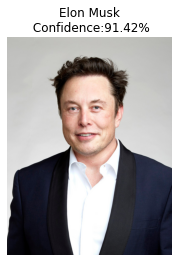

In [ ]:
img_path = plt.imread(insert_img_path)
confidence = round(np.max(prediction)*100,2)
plt.imshow(img_path)
plt.title(labels[np.squeeze(output.tolist())]+"\n Confidence:"+str(confidence)+"%")

plt.axis('off');
